In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_multiv import adaptedplot_solution_1, adaptedplot_solution_2

In this workspace, you will work with the fuel economy dataset from the previous lesson on bivariate plots.

In [2]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [3]:
fuel_econ.displ.describe()

count    3929.000000
mean        2.950573
std         1.305901
min         0.600000
25%         2.000000
50%         2.500000
75%         3.600000
max         7.000000
Name: displ, dtype: float64

In [4]:
fuel_econ.comb.describe()

count    3929.000000
mean       24.791339
std         6.003246
min        12.821700
25%        20.658100
50%        24.000000
75%        28.227100
max        57.782400
Name: comb, dtype: float64

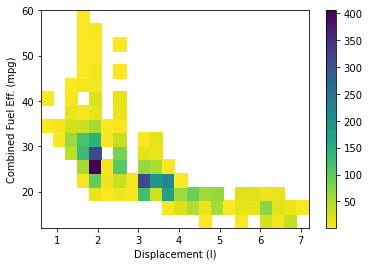

In [5]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5,
          cmap='viridis_r', bins=[bins_x, bins_y])
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar();

**Let's change this heat map of fuel efficiency against engine size, so that average CO2 output is plotted instead. If we change it so that each point's weight is equal to its CO2 emissions divided by the number of cars in its bin, then the _total_ within each bin will be the average CO2 emissions.**

In [6]:
displ_bins = pd.cut(fuel_econ['displ'], bins_x, right=False, include_lowest=False,
                   labels=False).astype(int)
comb_bins = pd.cut(fuel_econ['comb'], bins_y, right=False, include_lowest=False,
                  labels=False).astype(int)
n_points = fuel_econ.groupby([displ_bins, comb_bins]).size()
n_points = n_points.reset_index().pivot(index='displ', columns='comb').values
n_points

array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,   3.,  nan,   3.,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,   4.,   8.,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  42.,  62.,  31.,  15.,   7.,   4.,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,   6.,  55., 130., 119.,  34.,   7.,  nan,   7.,
          2.,   4.,   1.,   2.,   2.],
       [ nan,  nan,  15.,  98., 405., 311., 145.,  55.,  14.,  26.,   6.,
         10.,   3.,   3.,   5.,  nan],
       [ nan,  nan,   1.,  12.,   9.,  nan,   5.,   1.,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  11.,  37., 105.,  82.,  37.,   5.,  15.,  17.,  nan,
          1.,  nan,   1.,  nan,  nan],
       [ nan,  nan,   7.,   6.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan, 123., 311.,  64.,  17.,   2.,  nan,  nan,  nan,  nan,
         nan,  nan,  n

In [11]:
displ_bins

0       10
1        4
2       10
3       10
4        6
        ..
3924     4
3925     4
3926     4
3927     9
3928     9
Name: displ, Length: 3929, dtype: int64

In [12]:
comb_bins

0        2
1        4
2        2
3        2
4        5
        ..
3924    14
3925     9
3926    10
3927     3
3928     3
Name: comb, Length: 3929, dtype: int64

In [7]:
n_points[displ_bins, comb_bins]

array([173., 405., 173., ...,   6., 190., 190.])

In [8]:
# Each car's CO2 emission divided by the number of cars in its bin --> the CO2 weight for this car
# Then for one bin, all CO2 weights in this bin will add up --> just like co2_1/n + co2_2/n + ... + co2_n/n
# --> equal to (co2_1 + co2_2 + ... + co2_n)/n --> the average CO2 emissions
co2_weights = fuel_econ['co2'] / n_points[displ_bins, comb_bins]

In [9]:
co2_weights

0        2.722543
1        0.861728
2        2.479769
3        2.578035
4        3.780488
          ...    
3924    15.600000
3925     8.346154
3926    35.333333
3927     2.036842
3928     2.194737
Name: co2, Length: 3929, dtype: float64

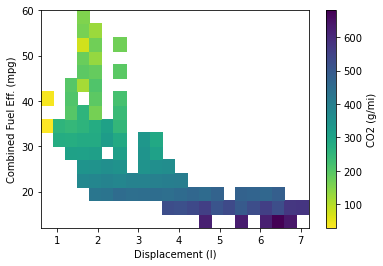

In [10]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5,
          cmap='viridis_r', bins=[bins_x, bins_y], weights=co2_weights)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar(label='CO2 (g/mi)');

**Task 1**: Plot the city ('city') vs. highway ('highway') fuel efficiencies (both in mpg) for each vehicle class ('VClass'). Don't forget that vehicle class is an ordinal variable with levels {Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, Large Cars}.

In [13]:
vehicle_class = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
v_class = pd.api.types.CategoricalDtype(categories=vehicle_class, ordered=True)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(v_class)

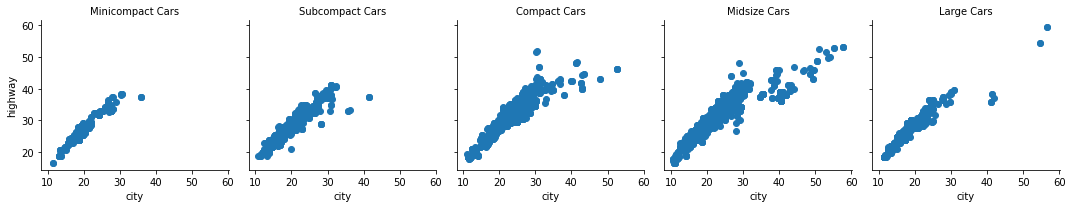

In [15]:
g = sb.FacetGrid(data=fuel_econ, col='VClass')
g.map(plt.scatter, 'city', 'highway')
g.set_titles(col_template='{col_name}');

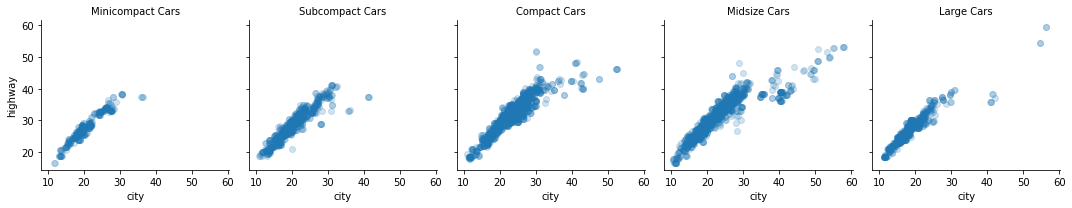

In [20]:
g = sb.FacetGrid(data=fuel_econ, col='VClass')
g.map(sb.regplot, 'city', 'highway', x_jitter=0.3, scatter_kws={'alpha':1/5}, fit_reg=False)
g.set_titles(col_template='{col_name}');

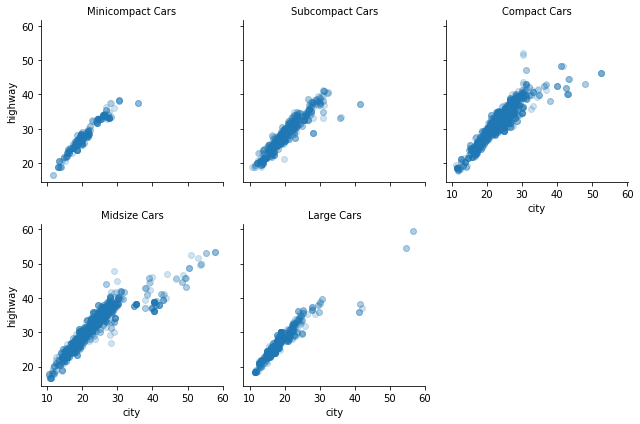

In [21]:
g = sb.FacetGrid(data=fuel_econ, col='VClass', height=3, col_wrap=3)
g.map(plt.scatter, 'city', 'highway', alpha=1/5)
g.set_titles(col_template='{col_name}');

Due to overplotting, I've taken a faceting approach to this task. There don't seem to be any obvious differences in the main cluster across vehicle classes, except that the minicompact and large sedans' arcs are thinner than the other classes due to lower counts. The faceted plots clearly show that most of the high-efficiency cars are in the mid-size and compact car classes.


/Users/meng/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


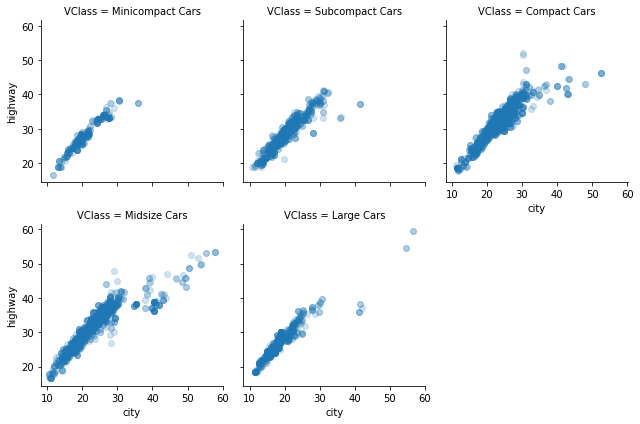

In [16]:
# run this cell to check your work against ours
adaptedplot_solution_1()

**Task 2**: Plot the relationship between engine size ('displ', in meters), vehicle class, and fuel type ('fuelType'). For the lattermost feature, focus only on Premium Gasoline and Regular Gasoline cars. What kind of relationships can you spot in this plot?

In [38]:
fuel_econ.fuelType.unique()

array(['Premium Gasoline', 'Regular Gasoline', 'Diesel',
       'Midgrade Gasoline', 'Natural Gas'], dtype=object)

In [39]:
df = fuel_econ.loc[fuel_econ['fuelType'].isin(['Regular Gasoline', 'Premium Gasoline'])]

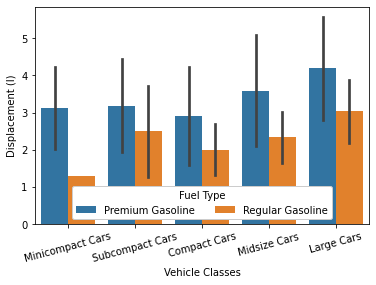

In [42]:
ax = sb.barplot(data=df, x='VClass', y='displ', hue='fuelType', ci='sd')
plt.xticks(rotation=15)
plt.xlabel('Vehicle Classes')
plt.ylabel('Displacement (l)')
ax.legend(loc=8, ncol=2, framealpha=1, title='Fuel Type');

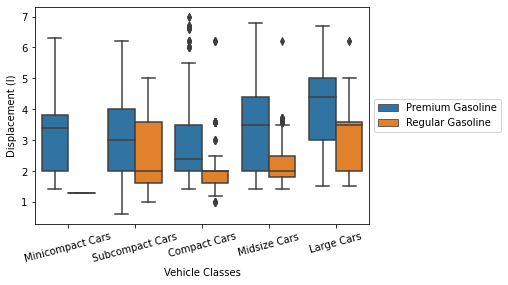

In [53]:
ax = sb.boxplot(data=df, x='VClass', y='displ', hue='fuelType')
plt.xticks(rotation=15)
plt.xlabel('Vehicle Classes')
plt.ylabel('Displacement (l)')
# legend to right of figure
ax.legend(loc=6, bbox_to_anchor=(1.0, 0.5));

I went with a clustered box plot on this task since there were too many levels to make a clustered violin plot accessible. The plot shows that in each vehicle class, engine sizes were larger for premium-fuel cars than regular-fuel cars. Engine size generally increased with vehicle class within each fuel type, but the trend was noisy for the smallest vehicle classes.


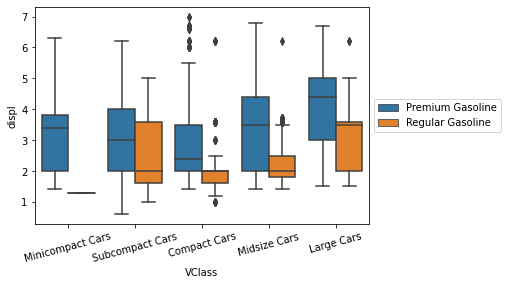

In [41]:
# run this cell to check your work against ours
adaptedplot_solution_2()